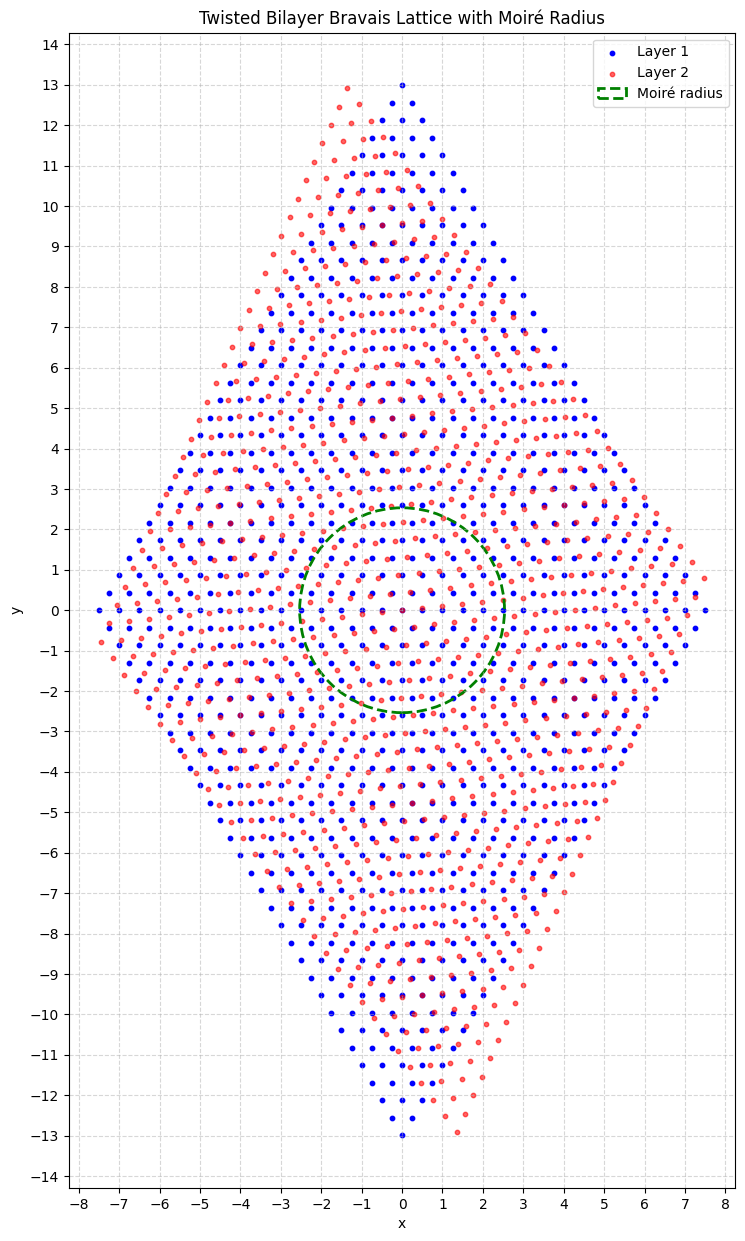

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from matplotlib.patches import Polygon


# Lattice constant
a = 500e-3  

# Primitive vectors
a1 = np.array([a/2, np.sqrt(3)*a/2])
a2 = np.array([a/2, -np.sqrt(3)*a/2])

# Rotation
theta = np.deg2rad(6.01)
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])
a1rot = R @ a1
a2rot = R @ a2

# Range of lattice points
nx, ny = 15, 15

# Generate lattice points
points_layer1 = []
points_layer2 = []

for i in range(-nx, nx+1):
    for j in range(-ny, ny+1):
        # Layer 1
        p1 = i*a1 + j*a2
        points_layer1.append(p1)
        
        # Layer 2
        p2 = i*a1rot + j*a2rot
        points_layer2.append(p2)

points_layer1 = np.array(points_layer1)
points_layer2 = np.array(points_layer2)

# Moiré radius
R_moire = a / (4 * np.sin(theta/2)) + 0.15

# Plot
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(points_layer1[:,0], points_layer1[:,1], s=10, color="blue", label="Layer 1")
ax.scatter(points_layer2[:,0], points_layer2[:,1], s=10, color="red", alpha=0.6, label="Layer 2")

# Circle
circle = patches.Circle((0, 0), R_moire, fill=False, color="green", linestyle="--", linewidth=2, label="Moiré radius")
ax.add_patch(circle)

# Formatting
ax.set_aspect("equal", adjustable="box")
ax.legend()
ax.set_title("Twisted Bilayer Bravais Lattice with Moiré Radius")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Add denser ticks if needed
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.grid(True, linestyle="--", alpha=0.5)

plt.show()


Layer 1 atoms inside circle: 91
Layer 2 atoms inside circle: 91


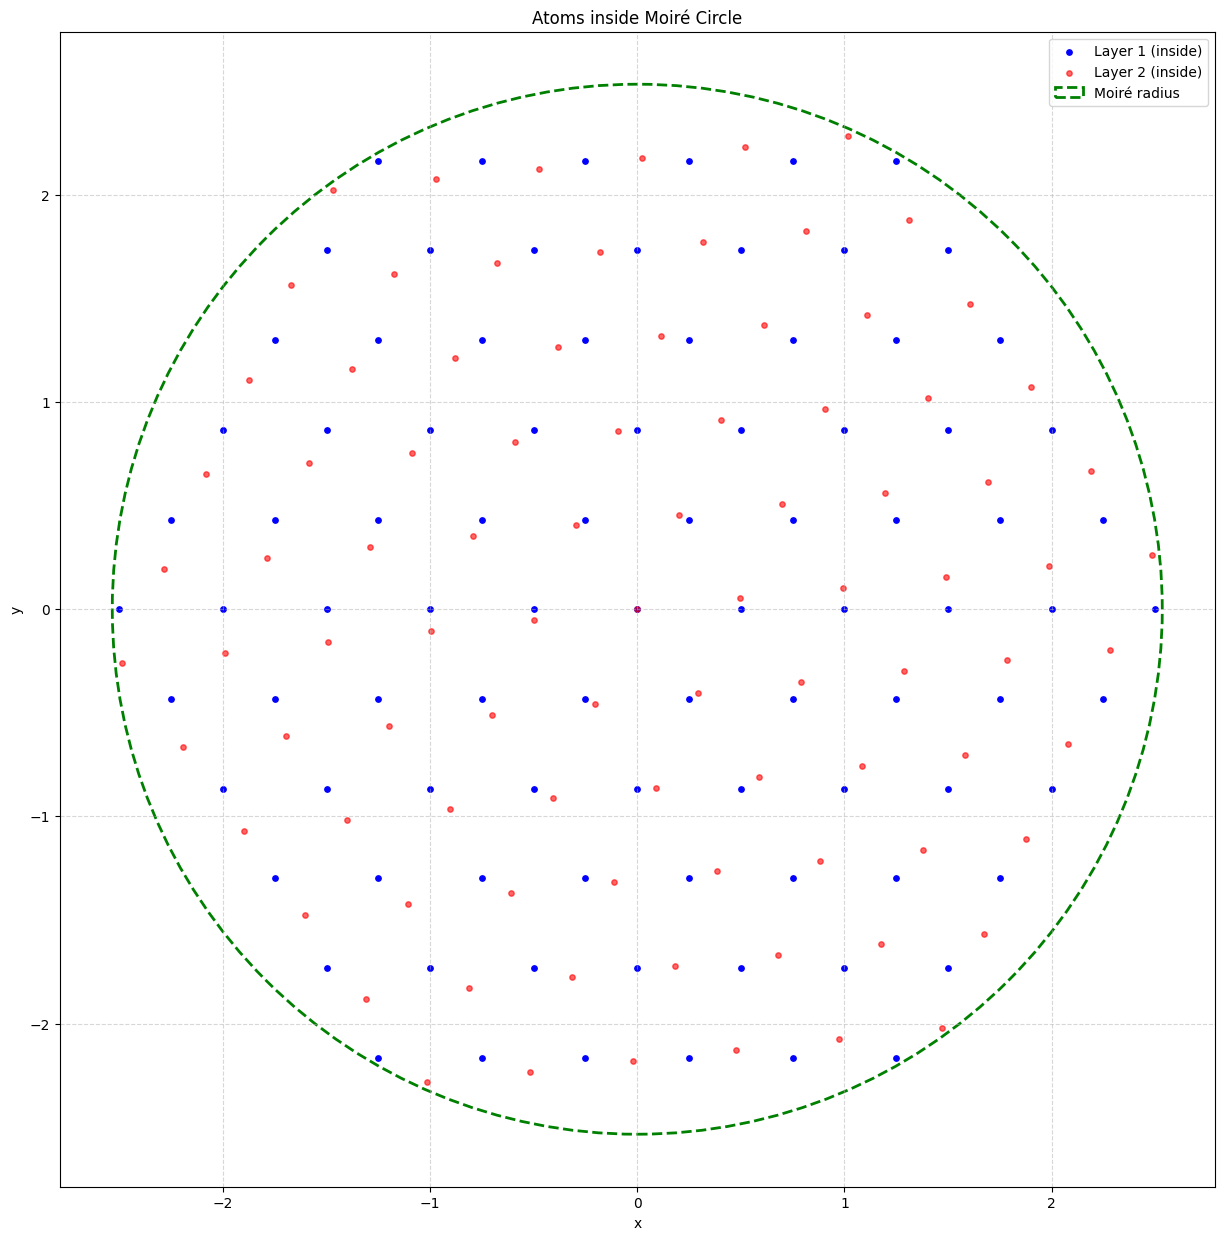

In [82]:
# Filter points inside the circle
def inside_circle(points, R):
    return points[np.linalg.norm(points, axis=1) <= R]

points_layer1_in = inside_circle(points_layer1, R_moire)
points_layer2_in = inside_circle(points_layer2, R_moire)

print("Layer 1 atoms inside circle:", points_layer1_in.shape[0])
print("Layer 2 atoms inside circle:", points_layer2_in.shape[0])

# Plot only inside points
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(points_layer1_in[:,0], points_layer1_in[:,1], s=15, color="blue", label="Layer 1 (inside)")
ax.scatter(points_layer2_in[:,0], points_layer2_in[:,1], s=15, color="red", alpha=0.6, label="Layer 2 (inside)")

# Circle
circle = patches.Circle((0, 0), R_moire, fill=False, color="green", linestyle="--", linewidth=2, label="Moiré radius")
ax.add_patch(circle)

# Formatting
ax.set_aspect("equal", adjustable="box")
ax.legend()
ax.set_title("Atoms inside Moiré Circle")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, linestyle="--", alpha=0.5)
plt.show()


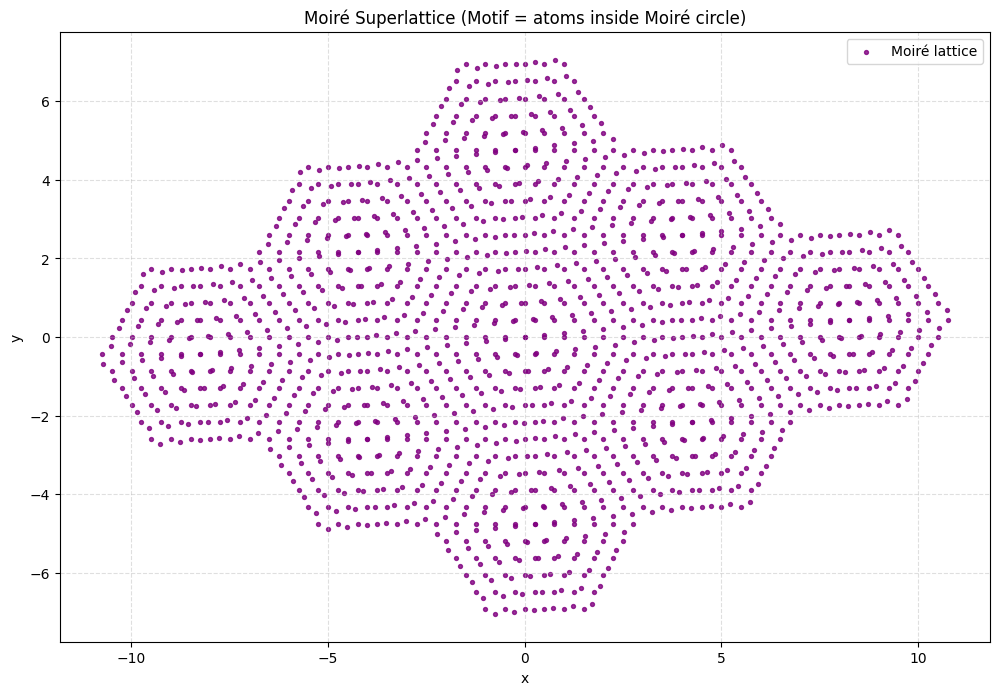

(array([ 0.8287033 , -1.27584742]), array([-0.69056462, -1.35560182]))

In [83]:
# Reciprocal lattice vectors of layer 1
G11 = (2*np.pi/(np.sqrt(3)*a)) * np.array([np.sqrt(3), 1])
G12 = (2*np.pi/(np.sqrt(3)*a)) * np.array([np.sqrt(3), -1])

# Rotate to get reciprocal lattice vectors of layer 2
G21 = R @ G11
G22 = R @ G12

# Moiré reciprocal vectors (difference)
g1_moire = G11 - G21
g2_moire = G12 - G22


G_moire = np.column_stack([g1_moire, g2_moire])
A_moire = 2*np.pi * np.linalg.inv(G_moire.T) 

A1 = A_moire[:,0]
A2 = A_moire[:,1]
# Use atoms inside Moiré circle as motif
motif = np.vstack([points_layer1_in, points_layer2_in])

# Generate superlattice by repeating motif with A1, A2
Nx, Ny = 1, 1  # how many supercells to plot
moire_points = []

for i in range(-Nx, Nx+1):
    for j in range(-Ny, Ny+1):
        shift = i*A1 + j*A2
        for atom in motif:
            pass
            moire_points.append(atom + shift)

moire_points = np.array(moire_points)

# Plot
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(moire_points[:,0], moire_points[:,1], s=8, color="purple", alpha=0.8, label="Moiré lattice")
ax.set_aspect("equal", adjustable="box")
ax.legend()
ax.set_title("Moiré Superlattice (Motif = atoms inside Moiré circle)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, linestyle="--", alpha=0.4)
plt.show()
g1_moire, g2_moire

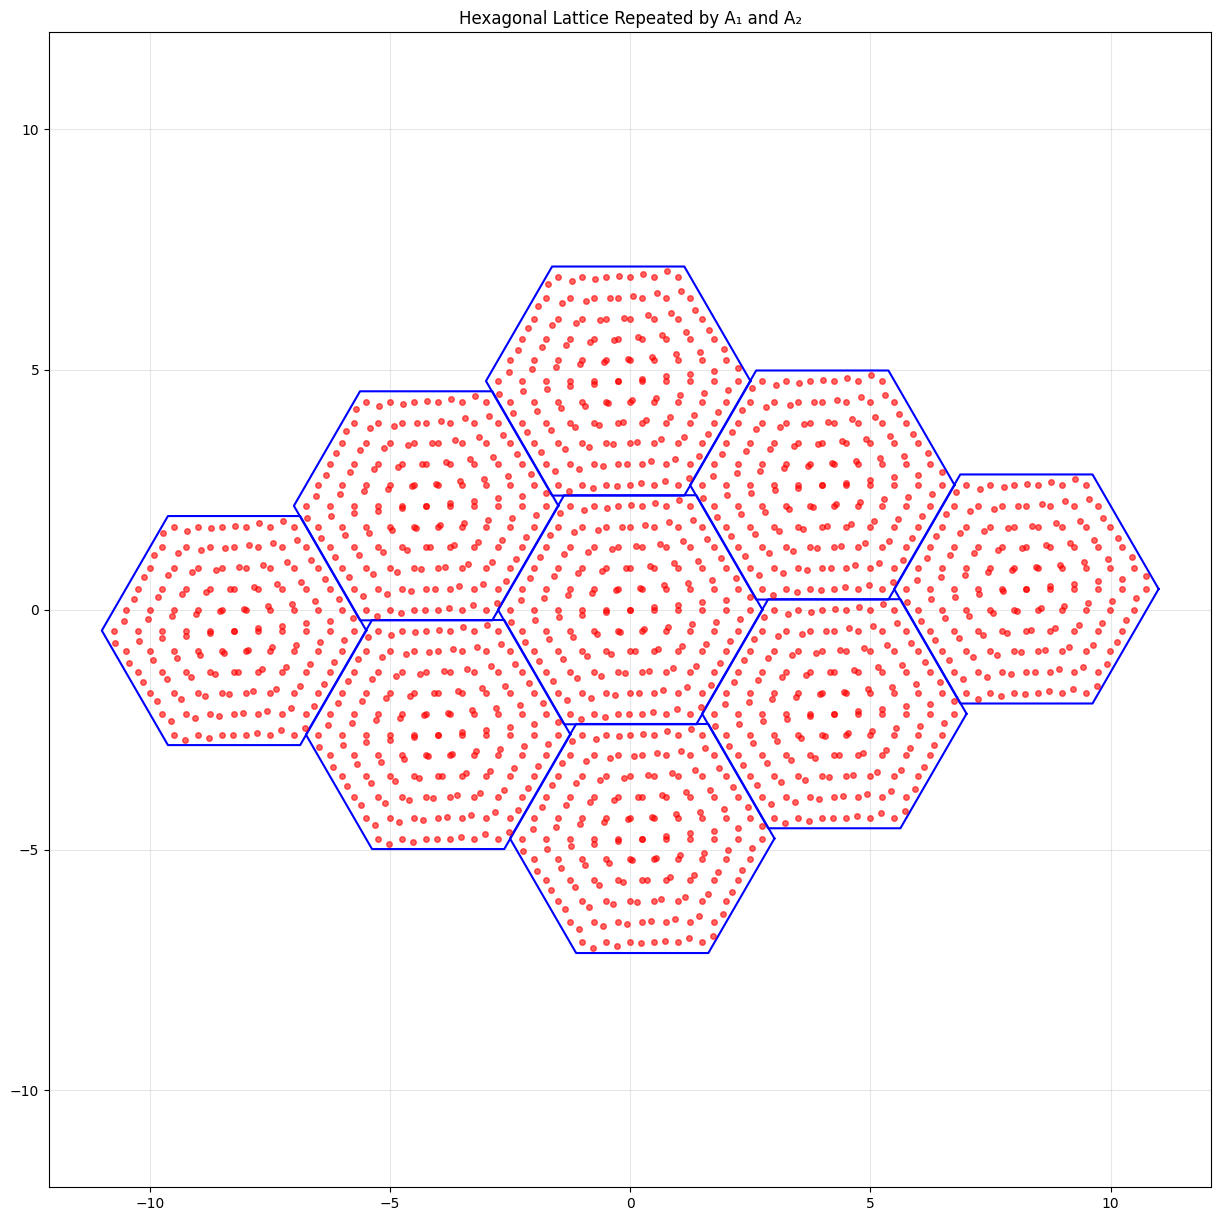

4.768889785612723
8.881784197001252e-16


In [94]:
import matplotlib.pyplot as plt
import numpy as np


# Given apothem (distance from center to a side)
a = np.linalg.norm(A2) / 2  # your original line
s = 2 * a / np.sqrt(3)
r = s  # radius for regular hexagon

# Compute single hexagon vertices
angles = np.linspace(0, 2 * np.pi, 7)
x_hex = r * np.cos(angles)
y_hex = r * np.sin(angles)

# Example inside points (replace with yours)
points_layer1_in = np.random.rand(10, 2) * 5
points_layer2_in = np.random.rand(10, 2) * 5

# Number of repeats in each direction
n1, n2 = 1, 1  # repeat along A1 and A2

plt.figure(figsize=(15, 15))

# Repeat the pattern
for i in range(-n1, n1+1):
    for j in range(-n2, n2+1):
        # Translation vector
        T = i * A1 + j * A2

        # Plot translated hexagon
        plt.plot(x_hex + T[0], y_hex + T[1], 'b-', linewidth=1.5)
plt.plot(moire_points[:,0], moire_points[:,1], 'ro', markersize=4, alpha=0.6)
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.title("Hexagonal Lattice Repeated by A₁ and A₂")
plt.show()
print(2*a)
print(500e-3/(2*np.sin(np.deg2rad(6.01)/2)) - 2*a)


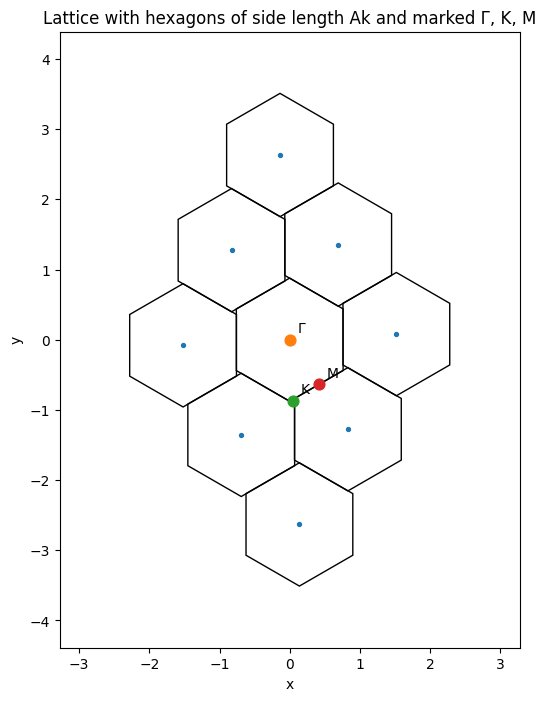

(array([ 0.8287033 , -1.27584742]), array([-0.69056462, -1.35560182]))

In [85]:
Ak = 8*np.pi*np.sin(theta/2)/(3*a)
Gamma = [0,0]
K = (g1_moire + g2_moire)/3
M = g1_moire/2

N = 1  # range of lattice indices (-N..N)
sites = []
for n in range(-N, N+1):
    for m in range(-N, N+1):
        pos = n*g1_moire + m*g2_moire
        sites.append(pos)
sites = np.array(sites)

# Function to create regular hexagon vertices centered at (cx,cy) with side length s
def hexagon_vertices(center, side):
    cx, cy = center
    # hexagon: 6 vertices, interior angle 120°, radius from center to vertex = side
    # But note: for a regular hexagon, distance from center to vertex = side.
    angles = np.linspace(0, 2*np.pi, 6, endpoint=False) + np.pi/6  # rotate so a flat side up
    verts = np.column_stack((cx + side*np.cos(angles), cy + side*np.sin(angles)))
    return verts

# Create the plot
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal', 'box')

# Plot lattice sites and hexagons
for center in sites:
    verts = hexagon_vertices(center, Ak)
    poly = Polygon(verts, closed=True, fill=False)  # don't set colors explicitly
    ax.add_patch(poly)

# Mark the lattice points (centers)
ax.scatter(sites[:,0], sites[:,1], s=8)  # small markers for lattice sites

# Plot and annotate Gamma, K, M placed at origin (Gamma) and relative positions shown near origin.
# We'll show these points relative to the origin for clarity.
ax.scatter([Gamma[0]], [Gamma[1]], s=60)  # Gamma
ax.scatter([K[0]], [K[1]], s=60)          # K
ax.scatter([M[0]], [M[1]], s=60)          # M
# ax.scatter([g1_moire[0]], [g1_moire[1]], s=60, color='orange')  # g1_moire
# ax.scatter([g2_moire[0]], [g2_moire[1]], s=60, color='green')   # g2_moire

# Annotate points
offset = 0.05 * max(1.0, np.linalg.norm([g1_moire, g2_moire]))  # small offset for labels
ax.annotate('Γ', xy=(Gamma[0], Gamma[1]), xytext=(Gamma[0]+offset, Gamma[1]+offset))
ax.annotate('K', xy=(K[0], K[1]), xytext=(K[0]+offset, K[1]+offset))
ax.annotate('M', xy=(M[0], M[1]), xytext=(M[0]+offset, M[1]+offset))


# Set limits to nicely frame the lattice
xmin, xmax = sites[:,0].min()-2*Ak, sites[:,0].max()+2*Ak
ymin, ymax = sites[:,1].min()-2*Ak, sites[:,1].max()+2*Ak
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

ax.set_title('Lattice with hexagons of side length Ak and marked Γ, K, M')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()
g1_moire, g2_moire

In [86]:
import pandas as pd

# Add layer info before merging
df1 = pd.DataFrame(points_layer1_in, columns=["x_cent", "y_cent"])
# df1["layer"] = 1

df2 = pd.DataFrame(points_layer2_in, columns=["x_cent", "y_cent"])
# df2["layer"] = 2

# Merge into one dataframe
df_all = pd.concat([df1, df2], ignore_index=True)

# Save to CSV
df_all.to_csv("moire_points.csv", index=False)

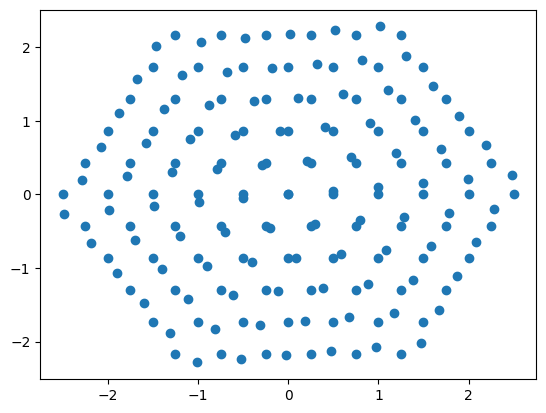

In [87]:
df = pd.read_csv("moire_points.csv")
plt.plot(df.x_cent, df.y_cent, 'o')